In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import *

In [7]:
class KMeans:
    def __init__(self):
        
        #クラスタの色
        self.color = ["r","b","c","m","y","g"]
        
        #二値指示変数
        self.r = [1,0]
        
        #クラスタ数
        self.k = 6
        
        #データ数
        self.node = 300
        
    def dataset(self,ave1,ave2,cov1,cov2,node):
        
        #平均
        mu1 = [ave1,ave1]
        mu2 = [ave2,ave2]
        
        #共分散
        cov = [[cov1,cov2],[cov2,cov1]]
    
        #データの生成
        x1,y1 = np.random.multivariate_normal(mu1,cov,node).T
        x2,y2 = np.random.multivariate_normal(mu2,cov,node).T
        self.X = np.append(x1,x2)
        self.Y = np.append(y1,y2)
        
    def cluster_center(self,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6):
        
        #クラスター中心の初期値
        self.u = [[x1,x2,x3,x4,x5,x6],[y1,y2,y3,y4,y5,y6]]
        
        
    def param_init(self):
        self.count = []
        self.sum = []
        self.t =[]
        self.clus = []
        self.b = []
        
    def figure_plot(self,X,Y,u,k,clus):
        
        #新しい描画を開始
        plt.figure()
        plt.scatter(self.X,self.Y,c=clus,s=20,marker="o",edgecolors='k')
        plt.scatter(u[0][0:k],u[1][0:k],c=["r","b","c","m","y","g"],s=100,marker="x",edgecolors='k')
        self.distance(X,Y,u,k)  
        
    def distance(self,X,Y,u,k):
        #変数の初期化
        self.param_init()
        
        #配列の準備
        for i in range(0,k):
            self.b.append([u[0][i],u[1][i]])
            self.count.append(0)
            self.sum.append([0.0,0.0])
            self.t.append(0)
        self.sum = np.array(self.sum)
        
        for i,j in zip(X,Y):
            distance = []
            a = np.array([i, j])
            
            #各中心と各データの二乗距離
            for i in range(0,k):
                distance.append(np.linalg.norm(self.b[i] - a))
            
            #クラス分け
            self.clus.append(self.color[distance.index(min(distance))])
            self.count[distance.index(min(distance))] += 1
            self.sum[distance.index(min(distance))] += a
        
        #クラスタ中心の更新
        for i in range(0,k):
            self.t[i] = self.sum[i]/self.count[i]
        for i in range(0,2):
            for j in range(0,k):
                self.u[i][j] = self.t[j][i]
                
        #歪み尺度

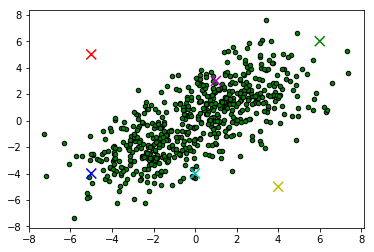

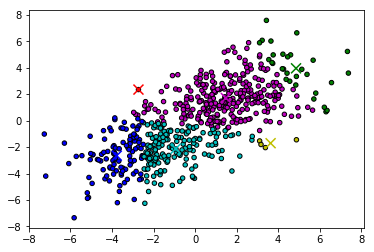

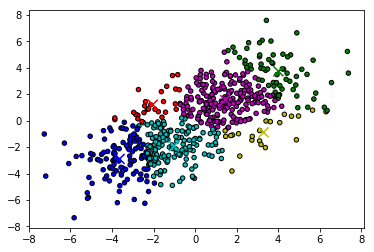

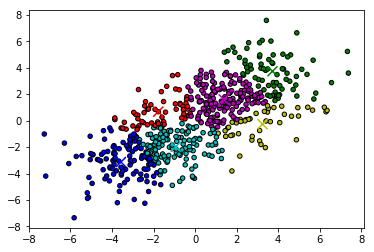

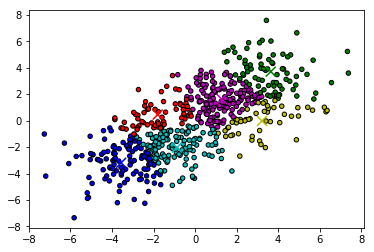

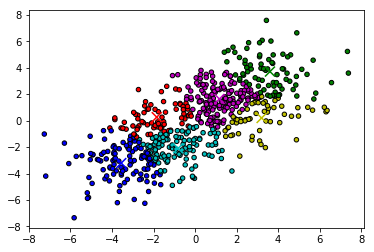

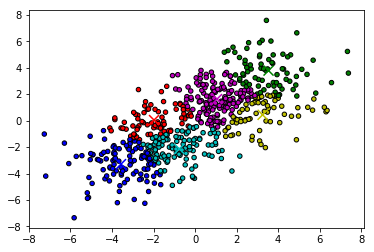

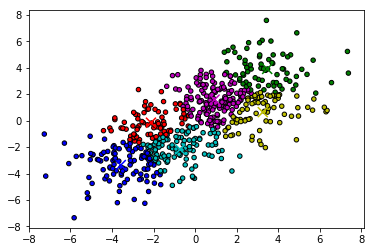

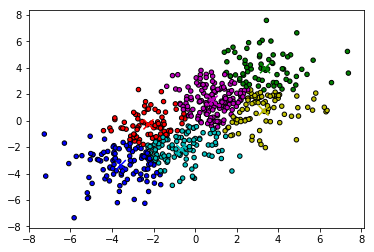

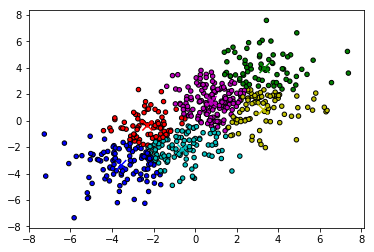

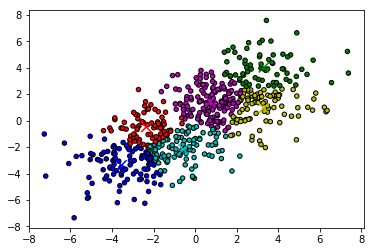

In [8]:
if __name__ == '__main__':
    km = KMeans()
    km.dataset(-2,2,3,1,km.node)
    km.cluster_center(-5,5,-5,-4,0,-4,1,3,4,-5,6,6)
    km.figure_plot(km.X,km.Y,km.u,km.k,km.color[5])
    
    for i in range(10):
        km.figure_plot(km.X,km.Y,km.u,km.k,km.clus)